<a href="https://colab.research.google.com/github/Meenakshigupta6527/Telco_Industry/blob/main/Telco_Industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Libraries


In [293]:
#importing pandas & numpy libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [294]:
#mounting Google Drive in Google Colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Data Collection**

In [295]:
#loading dataset

df=pd.read_csv('/content/drive/MyDrive/telcom_data.csv')

In [296]:
#display dataset

df.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [297]:
df.shape

(150001, 55)

In [298]:
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec

import seaborn as sns

#Plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

#Some styling
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

import plotly.io as pio
pio.templates.default = "gridon"

#Subplots
from plotly.subplots import make_subplots

#**Data Cleaning**

In [299]:

#df.isnull().sum()

#First we create a list of missing values by each feature
temp = list(df.isna().sum())

#then we create a list of columns and their missing values as inner list to a separate list
lst= []
i=0
for col in df.columns:
    insert_lst = [col,temp[i]]
    lst.append(insert_lst)
    i+=1

#finally create a dataframe
temp_df = pd.DataFrame(data=lst,columns=['Column_Name','Missing_Values'])

In [300]:
#The following columns have missing values

temp_df[temp_df['Missing_Values']>0].sort_values(by='Missing_Values',
                                                 ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')

,Column_Name,Missing_Values
0,Nb of sec with 37500B < Vol UL,130254
1,Nb of sec with 6250B < Vol UL < 37500B,111843
2,Nb of sec with 125000B < Vol DL,97538
3,TCP UL Retrans. Vol (Bytes),96649
4,Nb of sec with 31250B < Vol DL < 125000B,93586
5,Nb of sec with 1250B < Vol UL < 6250B,92894
6,Nb of sec with 6250B < Vol DL < 31250B,88317
7,TCP DL Retrans. Vol (Bytes),88146
8,HTTP UL (Bytes),81810
9,HTTP DL (Bytes),81474


In [301]:
columns_to_drop = df.columns[df.isnull().sum() > 85000]

In [302]:
df = df.drop(columns = columns_to_drop)

In [303]:
df.shape


(150001, 47)

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       149010 non-null  float64
 1   Start                           150000 non-null  object 
 2   Start ms                        150000 non-null  float64
 3   End                             150000 non-null  object 
 4   End ms                          150000 non-null  float64
 5   Dur. (ms)                       150000 non-null  float64
 6   IMSI                            149431 non-null  float64
 7   MSISDN/Number                   148935 non-null  float64
 8   IMEI                            149429 non-null  float64
 9   Last Location Name              148848 non-null  object 
 10  Avg RTT DL (ms)                 122172 non-null  float64
 11  Avg RTT UL (ms)                 122189 non-null  float64
 12  Avg Bearer TP DL

# **Feature Engineering**

#checking numerical and object columns

In [305]:
numerical_columns = df.select_dtypes(include='float').columns

In [306]:
categorical_columns = df.select_dtypes(include='object').columns

###Filling missing values of numerical columns with mean of that column

In [307]:
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

In [308]:
df[numerical_columns]

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,770.0000,662.00000,1.823652e+06,2.082014e+14,3.366496e+10,3.552121e+13,42.000000,5.000000,23.000000,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08
1,1.311448e+19,235.0000,606.00000,1.365104e+06,2.082019e+14,3.368185e+10,3.579401e+13,65.000000,5.000000,16.000000,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08
2,1.311448e+19,1.0000,652.00000,1.361762e+06,2.082003e+14,3.376063e+10,3.528151e+13,109.795706,17.662883,6.000000,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08
3,1.311448e+19,486.0000,171.00000,1.321509e+06,2.082014e+14,3.375034e+10,3.535661e+13,109.795706,17.662883,44.000000,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08
4,1.311448e+19,565.0000,954.00000,1.089009e+06,2.082014e+14,3.369980e+10,3.540701e+13,109.795706,17.662883,6.000000,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,451.0000,214.00000,8.123000e+04,2.082022e+14,3.365069e+10,3.548311e+13,32.000000,0.000000,52.000000,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08
149997,7.349883e+18,483.0000,187.00000,9.797000e+04,2.082019e+14,3.366345e+10,3.566051e+13,27.000000,2.000000,23.000000,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,1.311448e+19,283.0000,810.00000,9.824900e+04,2.082017e+14,3.362189e+10,3.572121e+13,43.000000,6.000000,43.000000,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,1.311448e+19,696.0000,327.00000,9.791000e+04,2.082021e+14,3.361962e+10,8.618620e+13,37.000000,5.000000,34.000000,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08


###Filling missing values of object columns with mode of that column

In [309]:
#df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode())
#df[categorical_columns]

In [310]:

# Filling missing values with mode for each categorical column
for col in categorical_columns:
    mode = df[col].mode()[0]  # Check the mode of the column
    df[col].fillna(mode, inplace=True)  # will fill missing values with the mode

In [311]:
df.isnull().sum()

,0
Bearer Id,0
Start,0
Start ms,0
End,0
End ms,0
Dur. (ms),0
IMSI,0
MSISDN/Number,0
IMEI,0
Last Location Name,0


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  float64
 1   Start                           150001 non-null  object 
 2   Start ms                        150001 non-null  float64
 3   End                             150001 non-null  object 
 4   End ms                          150001 non-null  float64
 5   Dur. (ms)                       150001 non-null  float64
 6   IMSI                            150001 non-null  float64
 7   MSISDN/Number                   150001 non-null  float64
 8   IMEI                            150001 non-null  float64
 9   Last Location Name              150001 non-null  object 
 10  Avg RTT DL (ms)                 150001 non-null  float64
 11  Avg RTT UL (ms)                 150001 non-null  float64
 12  Avg Bearer TP DL

In [313]:
df.duplicated().sum()

0

In [314]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Bearer Id,150001.0,1.013887e+19,2.883600e+18,6.917538e+18,7.349883e+18,7.349883e+18,1.304243e+19,1.318654e+19
Start ms,150001.0,4.991882e+02,2.886109e+02,0.000000e+00,2.500000e+02,4.990000e+02,7.490000e+02,9.990000e+02
End ms,150001.0,4.988009e+02,2.880967e+02,0.000000e+00,2.510000e+02,5.000000e+02,7.500000e+02,9.990000e+02
Dur. (ms),150001.0,1.046086e+05,8.103735e+04,7.142000e+03,5.744200e+04,8.639900e+04,1.324300e+05,1.859336e+06
IMSI,150001.0,2.082016e+14,2.144722e+10,2.040471e+14,2.082014e+14,2.082015e+14,2.082018e+14,2.140743e+14
MSISDN/Number,150001.0,4.188282e+10,2.438731e+12,3.360100e+10,3.365151e+10,3.366380e+10,3.368473e+10,8.823971e+14
IMEI,150001.0,4.847455e+13,2.237359e+13,4.400152e+11,3.546261e+13,3.572241e+13,8.611970e+13,9.900120e+13
Avg RTT DL (ms),150001.0,1.097957e+02,5.593426e+02,0.000000e+00,3.500000e+01,5.400000e+01,1.097957e+02,9.692300e+04
Avg RTT UL (ms),150001.0,1.766288e+01,7.652993e+01,0.000000e+00,3.000000e+00,7.000000e+00,1.766288e+01,7.120000e+03
Avg Bearer TP DL (kbps),150001.0,1.330005e+04,2.397180e+04,0.000000e+00,4.300000e+01,6.300000e+01,1.971000e+04,3.781600e+05


In [315]:
#df['Start'] = pd.to_numeric(df['Start'], errors='coerce')
#df['End'] = pd.to_numeric(df['End'], errors='coerce')
#df['Last Location Name'] = pd.to_numeric(df['Last Location Name'], errors='coerce')
#df['Handset Manufacturer'] = pd.to_numeric(df['Handset Manufacturer'], errors='coerce')
#df['Handset Type'] = pd.to_numeric(df['Handset Type'], errors='coerce')

In [316]:
# Replace NaN values with a specific integer, e.g., 0
#df['Start'].fillna(0, inplace=True)
#f['End'].fillna(0, inplace=True)
#df['Last Location Name'].fillna(0, inplace=True)
#df['Handset Manufacturer'].fillna(0, inplace=True)
#df['Handset Type'].fillna(0, inplace=True)

In [317]:
import pandas as pd

# Define a function to convert a date string to milliseconds
def to_milliseconds(date_str):
    try:
        timestamp = pd.to_datetime(date_str, format="%m/%d/%Y %H:%M", errors='coerce')
        return int(timestamp.timestamp() * 1000) if not pd.isnull(timestamp) else None
    except ValueError:
        return None

# Vectorized function to convert a Series of date strings to milliseconds
vectorized_to_milliseconds = np.vectorize(to_milliseconds)

# Convert 'Start' and 'End' columns
df['Start'] = vectorized_to_milliseconds(df['Start'])
df['End'] = vectorized_to_milliseconds(df['End'])

In [318]:
df['Last Location Name'] = pd.to_numeric(df['Last Location Name'], errors='coerce')
df['Last Location Name'].fillna(0, inplace=True)
df['Last Location Name'].isnull().sum()


0

In [319]:
# Display the first few rows and the updated data types
print(df.dtypes)

Bearer Id                         float64
Start                               int64
Start ms                          float64
End                                 int64
End ms                            float64
Dur. (ms)                         float64
IMSI                              float64
MSISDN/Number                     float64
IMEI                              float64
Last Location Name                float64
Avg RTT DL (ms)                   float64
Avg RTT UL (ms)                   float64
Avg Bearer TP DL (kbps)           float64
Avg Bearer TP UL (kbps)           float64
DL TP < 50 Kbps (%)               float64
50 Kbps < DL TP < 250 Kbps (%)    float64
250 Kbps < DL TP < 1 Mbps (%)     float64
DL TP > 1 Mbps (%)                float64
UL TP < 10 Kbps (%)               float64
10 Kbps < UL TP < 50 Kbps (%)     float64
50 Kbps < UL TP < 300 Kbps (%)    float64
UL TP > 300 Kbps (%)              float64
HTTP DL (Bytes)                   float64
HTTP UL (Bytes)                   

In [320]:
# Count the frequency of each handset
handset_counts = df['Handset Type'].value_counts()

# Get the top 10 handsets
top_10_handsets = handset_counts.nlargest(10)

print(top_10_handsets)

Handset Type
Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


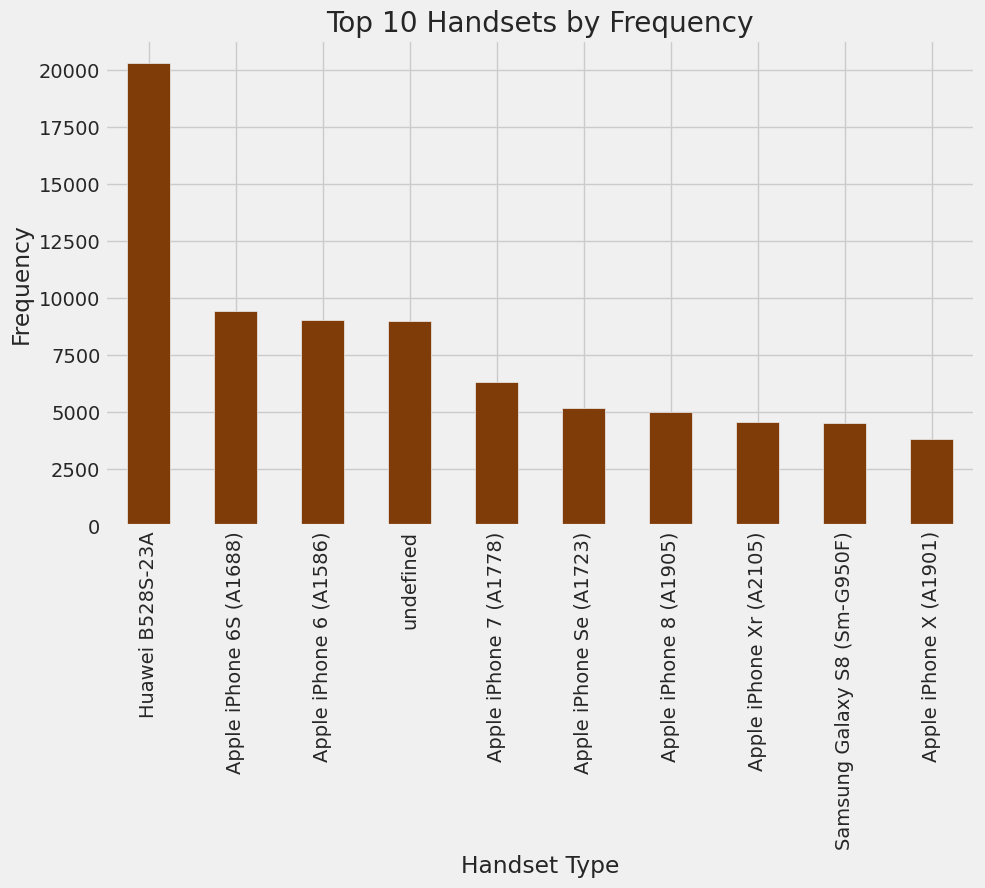

In [338]:
# Create a bar plot
plt.figure(figsize=(10, 6))
top_10_handsets.plot(kind='bar',colormap='PuOr')
plt.title('Top 10 Handsets by Frequency')
plt.xlabel('Handset Type')
plt.ylabel('Frequency')
#plt.xticks(rotation=0)
plt.show()

In [321]:
# Count the frequency of each manufacturer
manufacturer_counts = df['Handset Manufacturer'].value_counts()

# Get the top 3 manufacturers
top_3_manufacturers = manufacturer_counts.nlargest(3)

print(top_3_manufacturers)

Handset Manufacturer
Apple      60137
Samsung    40839
Huawei     34423
Name: count, dtype: int64


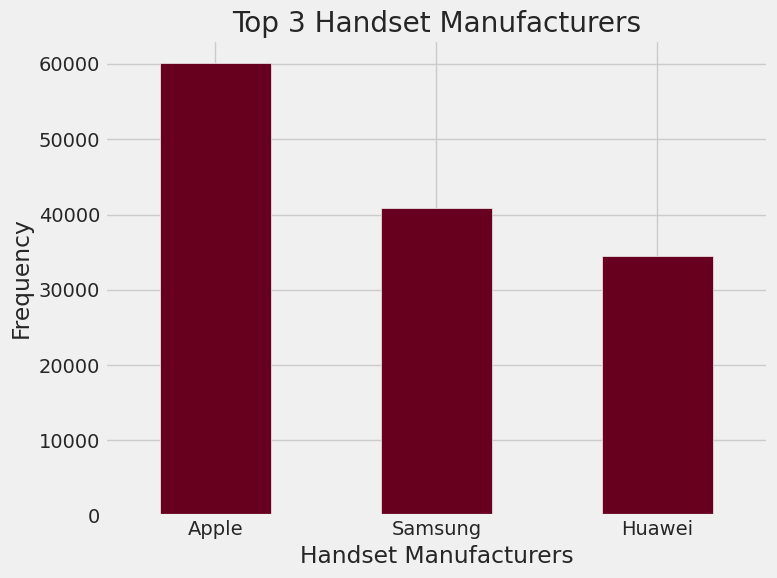

In [339]:
# Create a bar plot
plt.figure(figsize=(8,6))
top_3_manufacturers.plot(kind='bar',colormap='RdBu')
plt.title('Top 3 Handset Manufacturers')
plt.xlabel('Handset Manufacturers')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [370]:
#we have a dataframe df with columns 'Handset Manufacturer' and 'Handset Type'
top_manufacturers = df['Handset Manufacturer'].value_counts().nlargest(3).index

top_handsets = df[df['Handset Manufacturer'].isin(top_manufacturers)].groupby('Handset Manufacturer')['Handset Type'].apply(lambda x: x.value_counts().nlargest(5)).reset_index()

print(top_handsets)

   Handset Manufacturer                         level_1  Handset Type
0                 Apple         Apple iPhone 6S (A1688)          9419
1                 Apple          Apple iPhone 6 (A1586)          9023
2                 Apple          Apple iPhone 7 (A1778)          6326
3                 Apple         Apple iPhone Se (A1723)          5187
4                 Apple          Apple iPhone 8 (A1905)          4993
5                Huawei                Huawei B528S-23A         19752
6                Huawei                    Huawei E5180          2079
7                Huawei  Huawei P20 Lite Huawei Nova 3E          2021
8                Huawei                      Huawei P20          1480
9                Huawei                  Huawei Y6 2018           997
10              Samsung    Samsung Galaxy S8 (Sm-G950F)          4520
11              Samsung      Samsung Galaxy A5 Sm-A520F          3724
12              Samsung     Samsung Galaxy J5 (Sm-J530)          3696
13              Sams

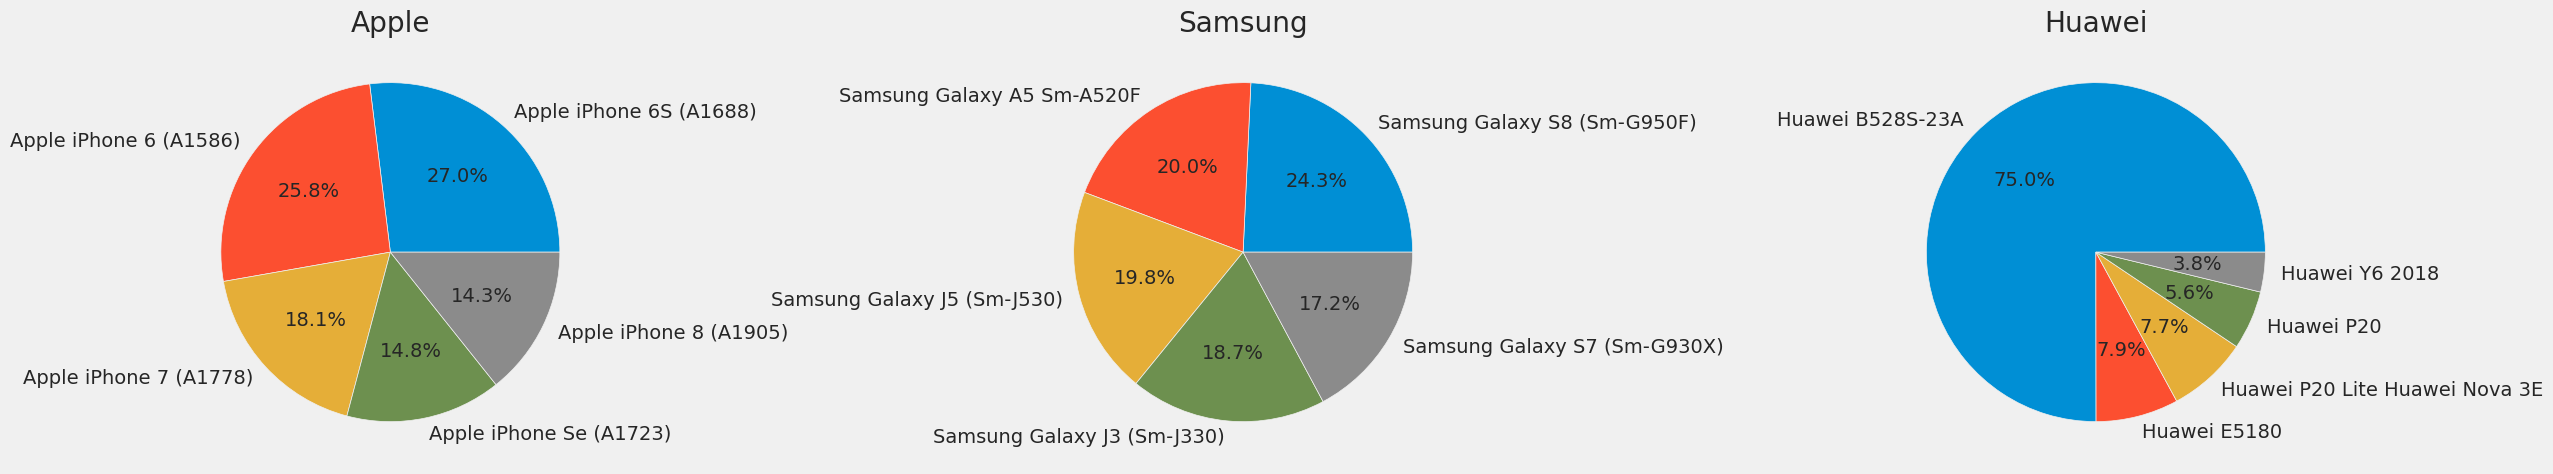

In [391]:
# Create a figure and axis object
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,8))

# Loop through the top manufacturers and create a pie chart for each
for i, manufacturer in enumerate(top_manufacturers):
    ax = axes[i]
    handset_counts = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().nlargest(5)
    ax.pie(handset_counts.values, labels=handset_counts.index, autopct='%1.1f%%')
    ax.set_title(manufacturer)

# Set the layout and show the plot
plt.tight_layout()
plt.show()

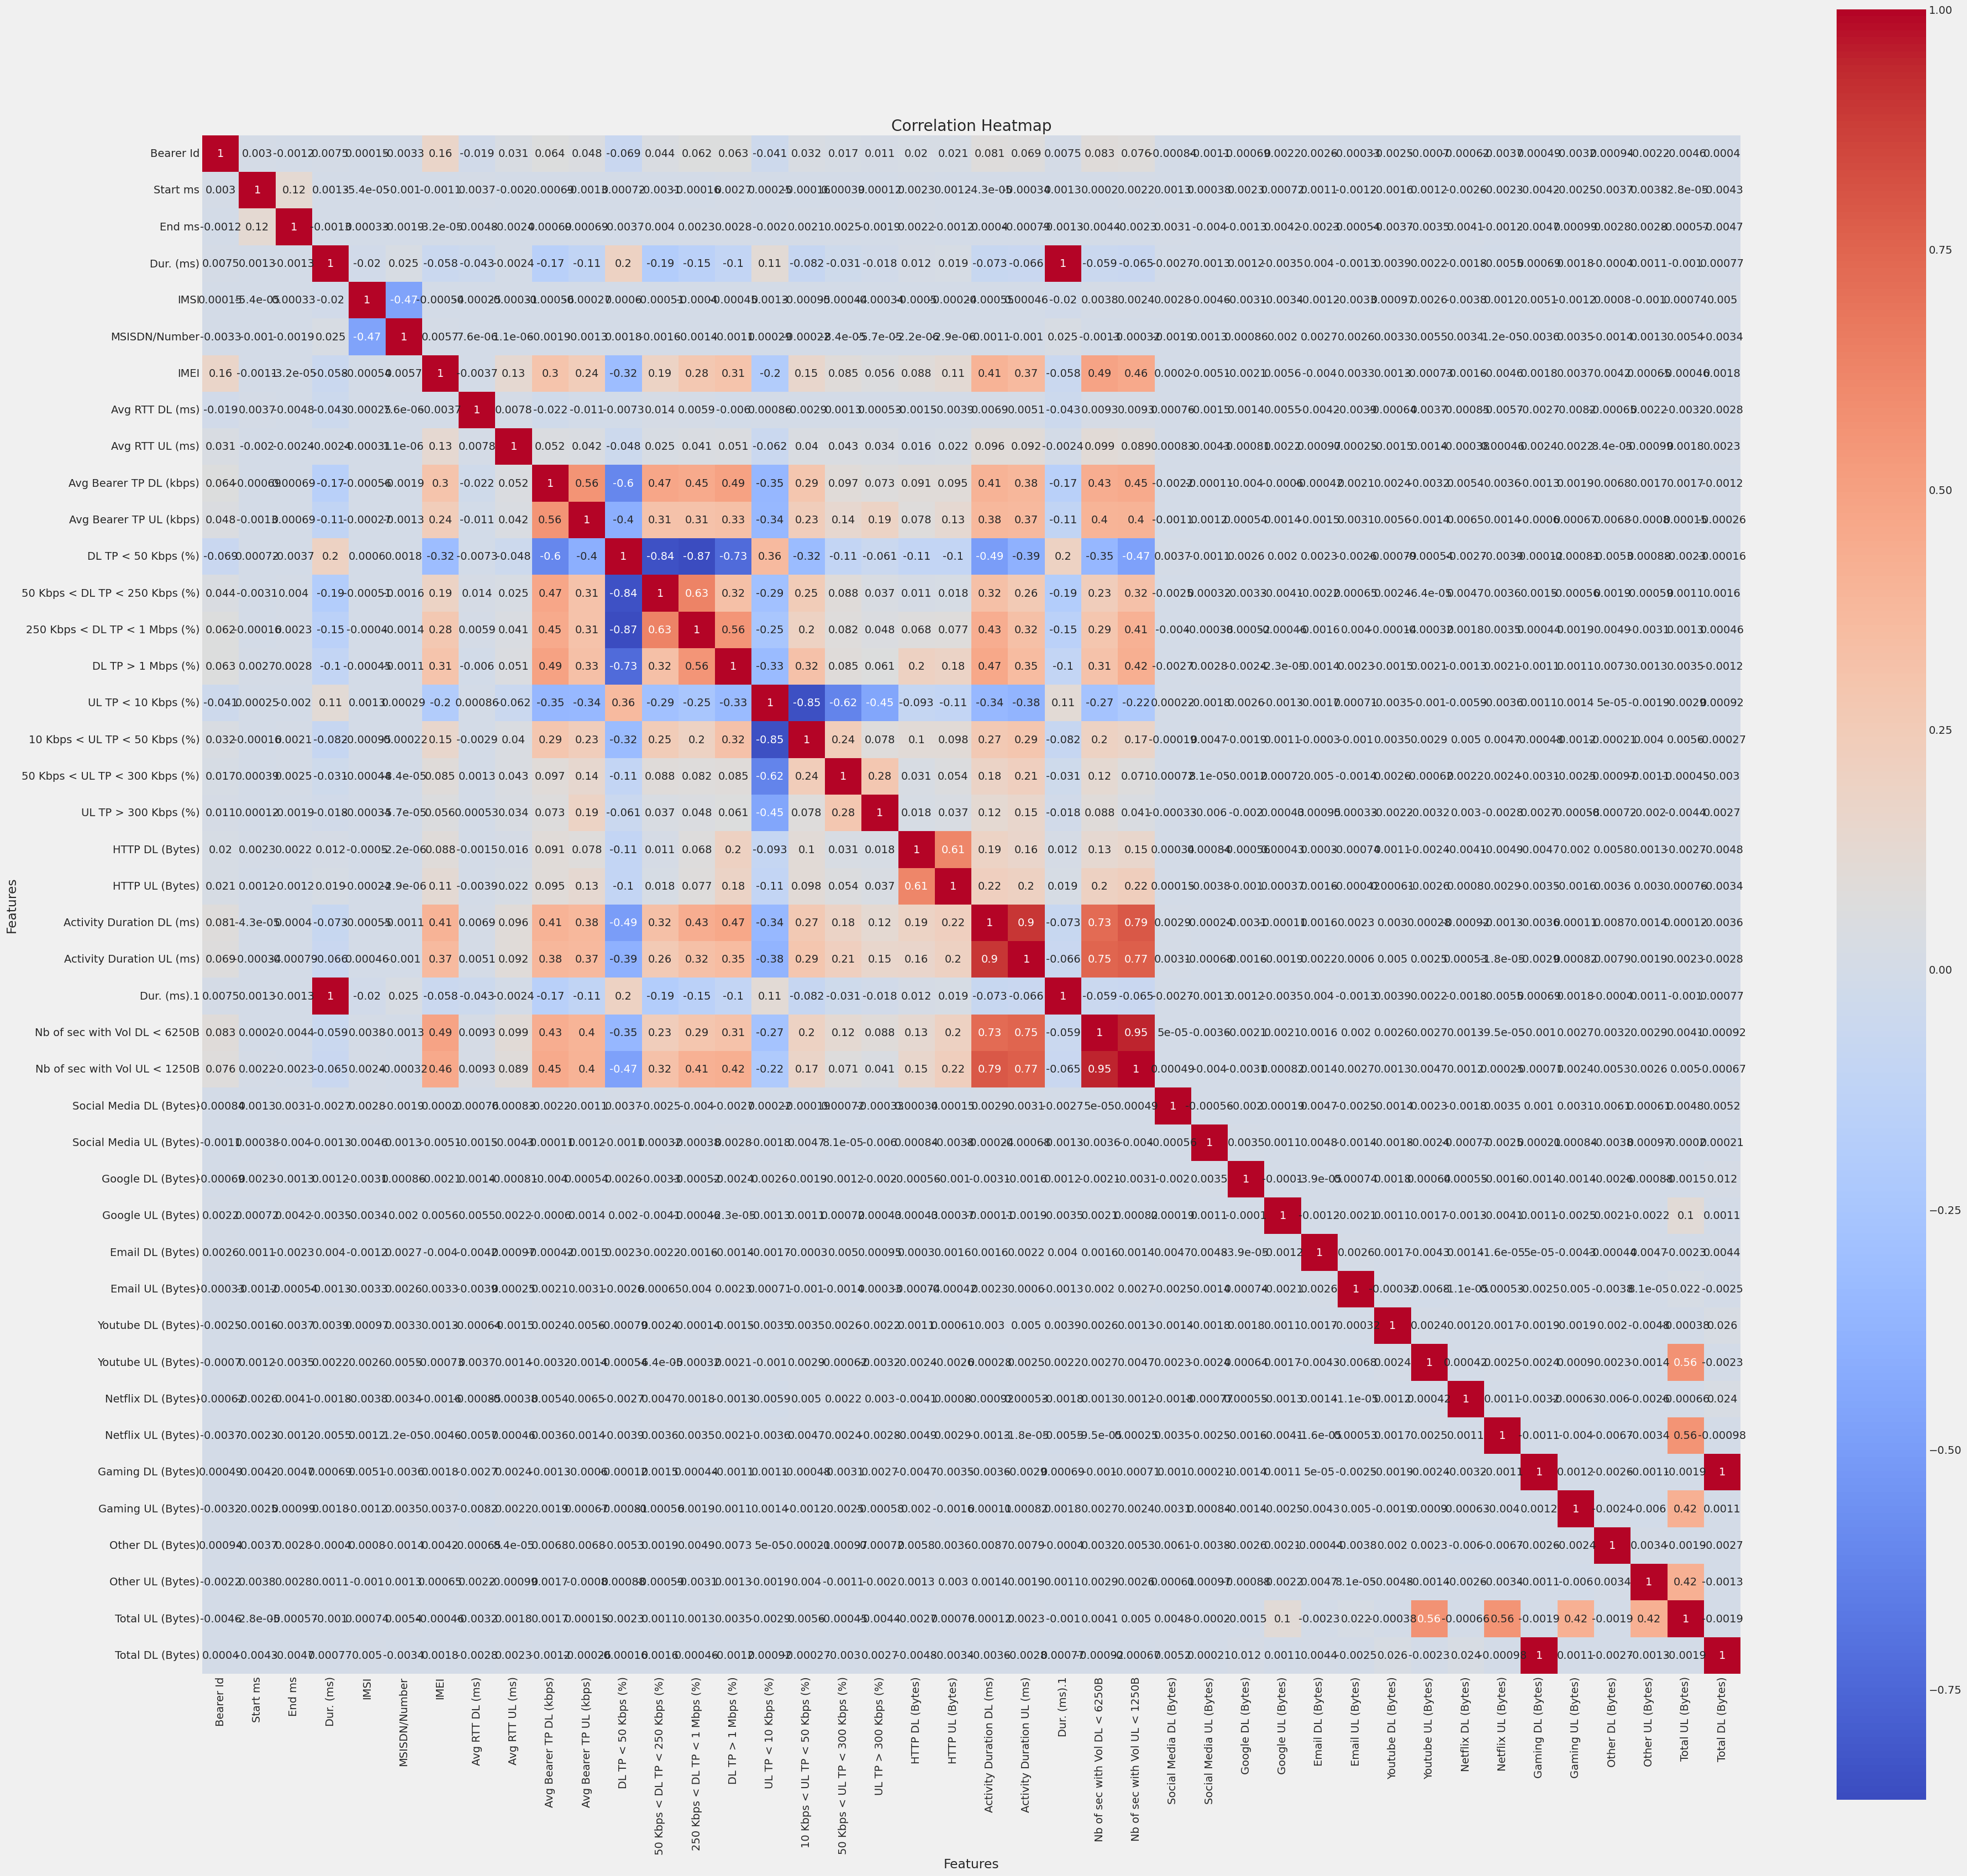

In [356]:
# Calculate the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(40, 10))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', square=True)

# Set the title and labels
ax.set_title('Correlation Heatmap')
ax.set_xlabel('Features')
ax.set_ylabel('Features')

# Show the plot
plt.show()

In [357]:
def find_outliers(col):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    IQR = q3 - q1
    ll = q1 - (1.5*IQR)
    ul = q3 + (1.5*IQR)
    upper_outliers = col[col > ul].index.tolist()
    lower_outliers = col[col < ll].index.tolist()
    bad_indices = list(set(upper_outliers + lower_outliers))
    return(bad_indices)

import numpy as np
bad_indexes = []
for col in df.columns:
    if df[col].dtype in ["int64","float64"]:
        bad_indexes.append(find_outliers(df[col]))

bad_indexes = set(list(np.concatenate(bad_indexes).flat))
print(len(bad_indexes))

85042


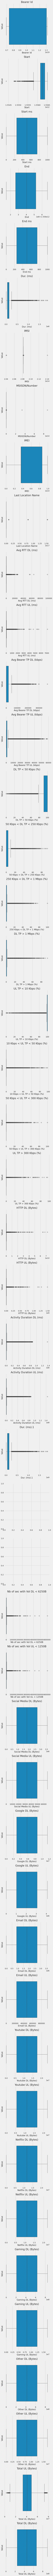

In [360]:
# Create a figure with subplots for each column
fig, axs = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(6, 6*len(df.columns)))

for i, col in enumerate(df.columns):
    if df[col].dtype in ["int64", "float64"]:
        sns.boxplot(x=df[col], ax=axs[i])
        axs[i].set_title(col)
        axs[i].set_ylabel('Value')

plt.tight_layout()
plt.show()
